In [0]:
import os, warnings
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')  

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [0]:
learning_rate = 0.01 # 학습율 0.01
training_epoch = 20 # 훈련 전체 데이터 사용 횟수 20회
batch_size = 100 # 배치 사이즈 100
n_hidden = 256 # 은닉층의 노드 개수 256
n_input = 28 * 28 # 784개 (입력층)

## 인코더(encoder)
* STEP 01. n_hidden 개의 뉴련을 가지는 은닉층 만들기
* STEP 02. 가중치(W)와 편향변수(B)를 원하는 뉴런만큼 만들기
* STEP 03. 활성화 함수 sigmoid 함수 적용
* 입력층 노드보다 은닉층 노드 값이 더 적다.
- 은닉층이 더 큰 오토 인코더 모델도 있음

In [7]:
X = tf.placeholder(tf.float32, [None, n_input])
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))
encoder

<tf.Tensor 'Sigmoid_2:0' shape=(?, 256) dtype=float32>

## 디코더(decoder)
* 입력 값은 은닉층의 노드수가 된다.
* 출력 값은 입력층의 크기가 된다.
* 오토 인코더의 최종 목표 : 출력값과 입력값을 가장 비슷하게 만든다.

In [9]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))
decoder

<tf.Tensor 'Sigmoid_4:0' shape=(?, 784) dtype=float32>

## 비용, 최적화

In [10]:
cost = tf.reduce_mean(tf.pow(X-decoder,2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
total_batch = int(mnist.train.num_examples/batch_size)

In [20]:
for epoch in range(training_epoch):
  total_cost = 0

  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, cost_val = sess.run([optimizer, cost],
                           feed_dict = {X:batch_xs})
    total_cost += cost_val
  print('{:02d}) AVG_cost = {}'. format(epoch+1, total_cost/total_batch))

print('최적화 완료!')

01 AVG_cost = 0.03468881013718518
02 AVG_cost = 0.034181911383162844
03 AVG_cost = 0.032624187506735326
04 AVG_cost = 0.029954903230748394
05 AVG_cost = 0.029063766006041658
06 AVG_cost = 0.028745804987847803
07 AVG_cost = 0.02853241011161696
08 AVG_cost = 0.028148333894258196
09 AVG_cost = 0.027927940179678527
10 AVG_cost = 0.02725187875330448
11 AVG_cost = 0.026878949508748272
12 AVG_cost = 0.026401659016582098
13 AVG_cost = 0.026029629778455604
14 AVG_cost = 0.02586468993262811
15 AVG_cost = 0.025614377954466777
16 AVG_cost = 0.025255706008862365
17 AVG_cost = 0.02504195800559087
18 AVG_cost = 0.024935010956092313
19 AVG_cost = 0.024889396798204292
20 AVG_cost = 0.02476982576941902
최적화 완료!


In [23]:
sample_size = 10
samples = sess.run(decoder,
                   feed_dict = {X:mnist.test.images[:sample_size]})
samples.shape

(10, 784)

<function matplotlib.pyplot.show>

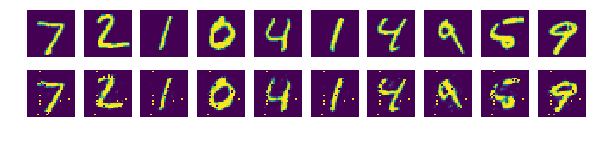

In [25]:
fix, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
  ax[1][i].imshow(np.reshape(samples[i], (28,28)))

plt.show